In [1]:
## showWakeProfilesFromSOWFA


In [2]:
# This script, can later be adapted to wake-profile tuning scripts, for now just opens some wake profile data from SOWFA and displays
# it to enable understanding of the available data

In [8]:
# Needed Modules
%matplotlib inline
import os
#from readSuperCONOUT import readSuperCONOUT
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import cPickle as pickle
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

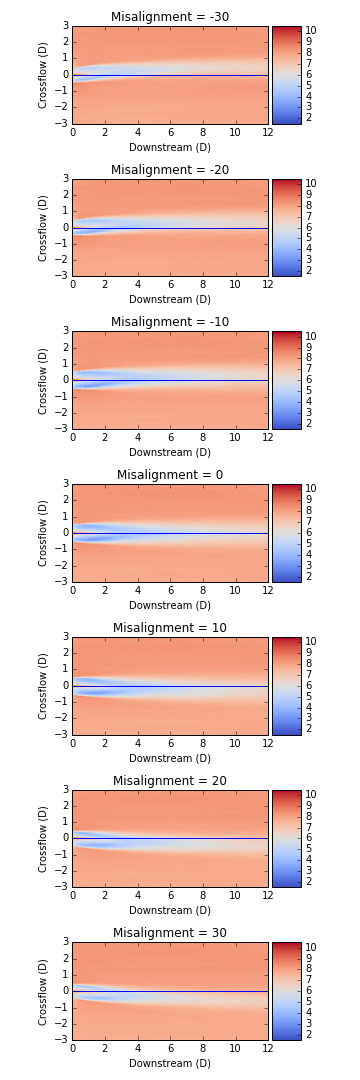

In [9]:
# This data set is of average results from a SOWFA simulation of a single NREL 5MW turbine
# Each simulation is named according to the yaw misalignment of the upstream turbine,
# The attached figure shows the full slices of data for the cases run


Image(filename=os.path.join('figures','slices.png') )

In [10]:
# From these slices, cross-stream wake profiles of the axial velocity of the flow were extracted every diamater
# For the NREL 5MW turbine, D is 126m, this can be used for conversion
D = 126. # m

In [11]:
# Load the data
downStreamLocs,ySampling,caseNames,wakeProfiles = pickle.load( open( os.path.join('data','wakeProfiles.p'), "rb" ) )

# Loaded data:
# downStreamLocs - array of locations downstream where profiles are taken
# ySampling - cross stream points (in D) for profiles
# caseNames - the names of the cases (which are named by the yaw angle of upstream turbine)
# wakeProfiles, a 2-D array (first index downstream distance, second is case) of the wake profilers

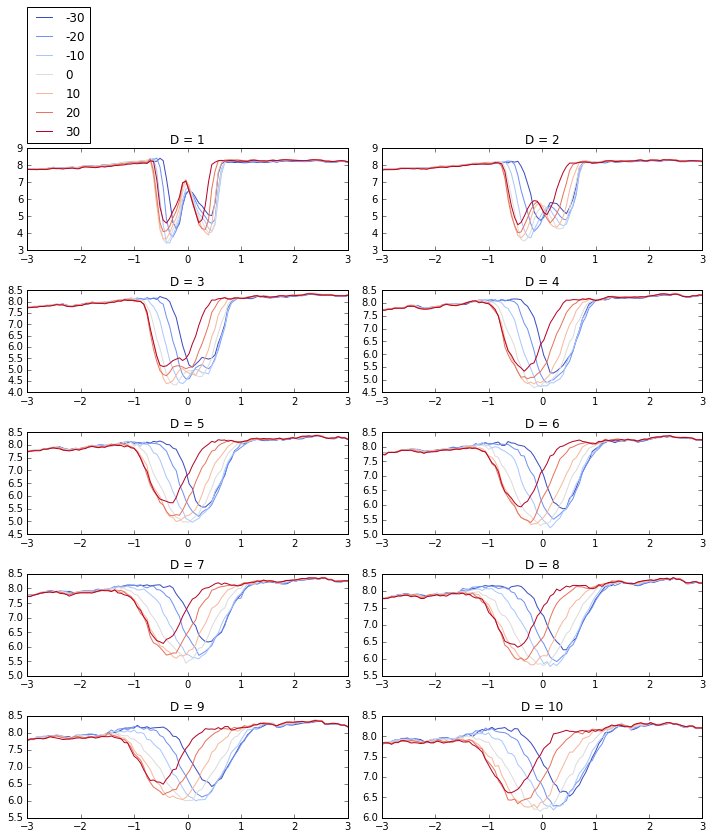

In [12]:
# Plot the wake profiles

# Derive data
numCase = len(caseNames)

# Set up plot and colors
colorIndex = np.linspace(0.,1.,numCase)
colors = plt.cm.coolwarm(colorIndex)
fig, axarr = plt.subplots(len(downStreamLocs)/2,2,figsize=(10,10))
axarr =  axarr.flatten()


for c in range(numCase):  
    for dIdx, d in enumerate(downStreamLocs):
        axarr[dIdx].plot(ySampling,wakeProfiles[dIdx][c],label=caseNames[c],color=colors[c])
        axarr[dIdx].set_title('D = %d' % d)

axarr[0].legend(bbox_to_anchor=(0, 1.05), loc='lower left', borderaxespad=0.)